In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rainfall_data= {
'Year':[1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
'Price':[0.45 ,0.39 ,0.46 ,0.37 ,0.52 ,0.50 ,0.50 ,0.52 ,0.56 ,0.53 ,0.56 ,0.65 ,0.52 ,0.56 ,0.55 ,0.64 ,0.59 ,0.58 ,0.61 ,0.64 ,0.62 ,0.71 ,0.74 ,0.86 ,0.87 ,0.89 ,0.96 ,0.91 ,0.93 ,0.93 ,1.02 ,0.98 ,1.04 ,1.13 ,1.25 ,1.23 ,1.17 ,1.32 ,1.39],
"Rainfall":[50.17, 44.87, 62.58, 66.26, 50.21, 53.73, 54.39, 54.74, 54.27, 50.39, 43.53, 64.47, 58.09, 51.17, 66.8, 61.46, 55.73, 62.63, 58.14, 51.12, 43.16, 54.56, 59.49, 61.11,59.22,62.75,42.63,45.21,55.12,56.05,49.19,48.99,55.51,59.8,59.13,52.86,52.99,58.52,60.52]}
rainfall_data = pd.DataFrame(rainfall_data, columns = ['Year', 'Price','Rainfall'])
rainfall_data.head()

,Year,Price,Rainfall
0,1980,0.45,50.17
1,1981,0.39,44.87
2,1982,0.46,62.58
3,1983,0.37,66.26
4,1984,0.52,50.21


/tmp/ipykernel_33608/1711879559.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=rainfall_data,x="Year",y="Price", palette = 'muted')


<Axes: xlabel='Year', ylabel='Price'>

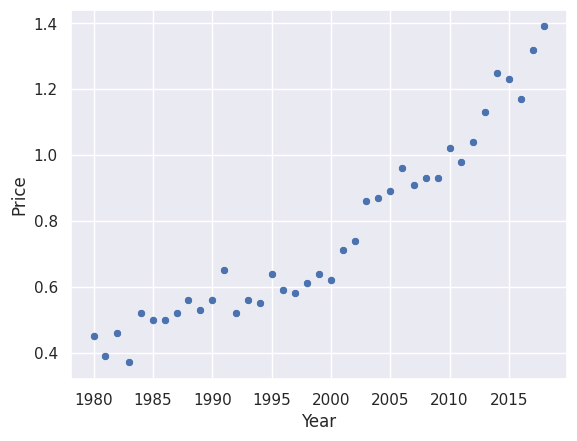

In [12]:
#plt.scatter(data=rainfall_data,x="Year",y="Price")
sns.scatterplot(data=rainfall_data,x="Year",y="Price", palette = 'muted')
#¿Se observa tendencia entre Price y rainfall?

# Gradiente descendiente

In [ ]:


def grad_desc(alpha:float,w_0:np.array,f,grad_f,tolerance,max_iter):
    """
    Returns minimum of loss function via gradient descent.
    Parameters:
     -alpha: learning rate.
     -w_0: (d,) vector of initial position. 
     -f: loss function R^d-->R to minimize
     -grad_f: gradient of f: R^d-->R^d
     -tolerance: termination condition if difference between two iterations objective function (err) is smaller.
     -max_iter: maximum iterations.
     -armijo: if Armijo's condition is used for line search to determine alpha at each step
    Returns:
     - minimum of loss function f"""
    w_i=np.copy(w_0)
    hist=[w_i]
    err=np.inf
    iter=0
    while err>tolerance:
        
        if iter>max_iter:
            print("Max iter reached")
            return np.array(hist)
        grad_eval=grad_f(w_i)
        w_next=w_i-alpha*grad_eval
        #err=np.linalg.norm(w_next-w_i)
        err=np.linalg.norm(grad_eval)
        w_i=w_next
        hist.append(w_i)
        iter+=1

    return np.array(hist)


def loss_gradient_linear(vect_w:np.array,matrix_X:np.array,vect_y:np.array)-> np.array:
    """ 
    Returns gradient of loss function C(w_vect)=1/(2*n)*np.sum((y_hat-y)**2)
    Parameters:
     -vect_w: (d,) vector of weights of current iteration in which we evaluate the gradient.
     -matrix_X: (n,d) matrix of feature data.
     -vect_y: corresponding output vector of each row (observation) from matrix_X.
     -linear: True (default) if estimation model is linear regression, False if model is logistic regression.
    Returns:
     -nabla_C: gradient vector evaluated at x
    """
    n=matrix_X.shape[0]
    y_hat=#Predicción del modelo
    
    return ##

# Uso de implementación


In [ ]:
# f=lambda x: 0.5*(x[0]-4.5)**2+2.5*(x[1]-2.3)**2
# grad_f=lambda x: np.array([x[0]-4.5,5*(x[1]-2.3)])

f=lambda x:3*x[0]**2+4*x[1]**2-5*x[0]+7
grad_f=lambda x:np.array([6*x[0]-5,8*x[1]])
x_0=np.array([1,1])
#Solver
from scipy.optimize import minimize
result=minimize(f,x_0,method="trust-constr",jac=grad_f)
print(result.x[0],result.x[1])#[4.5,2.3]

#Implemented
hist=grad_desc(0.1,x_0,f,grad_f,1e-10,500,armijo=True)
print(hist[-1])
min_x=result.x[0],result.x[1]
min_f=f(min_x)